### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='darkgrid',font_scale=1.25)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

import scipy.cluster.hierarchy as sch

from mpl_toolkits.mplot3d import Axes3D

pd.set_option('display.max_columns', None) 

In [2]:
df = pd.read_csv("measurement.csv")

In [3]:
df

,id,friendly,inviting,awesome,quirky,pleasant
0,192,8.190957,8.190957,9.190957,10.0,10.000000
1,165,8.465142,8.465142,9.465142,10.0,8.465142
2,161,9.416985,10.000000,10.000000,10.0,9.416985
3,37,10.000000,10.000000,10.000000,10.0,10.000000
4,65,8.513661,8.513661,9.513661,10.0,8.513661
...,...,...,...,...,...,...
195,116,7.318483,7.318483,8.318483,10.0,5.318483
196,182,7.542145,6.542145,6.542145,10.0,6.542145
197,180,9.384686,10.000000,10.000000,10.0,8.384686
198,126,6.579968,7.579968,3.579968,10.0,7.579968


In [4]:
X = df.iloc[:,1:]

In [5]:
X.values

array([[ 8.19095708,  8.19095708,  9.19095708, 10.        , 10.        ],
       [ 8.46514231,  8.46514231,  9.46514231, 10.        ,  8.46514231],
       [ 9.41698482, 10.        , 10.        , 10.        ,  9.41698482],
       [10.        , 10.        , 10.        , 10.        , 10.        ],
       [ 8.51366141,  8.51366141,  9.51366141, 10.        ,  8.51366141],
       [ 6.85251479,  5.85251479,  8.85251479, 10.        ,  6.85251479],
       [ 9.64567203, 10.        , 10.        , 10.        , 10.        ],
       [ 9.97072931, 10.        , 10.        , 10.        , 10.        ],
       [ 8.65281925,  9.65281925,  8.65281925, 10.        ,  7.65281925],
       [ 8.70378709,  8.70378709,  9.70378709, 10.        ,  7.70378709],
       [10.        , 10.        , 10.        , 10.        , 10.        ],
       [ 8.36996188,  7.36996188,  8.36996188, 10.        ,  7.36996188],
       [10.        ,  8.0088795 , 10.        , 10.        ,  9.0088795 ],
       [ 9.42836539,  9.42836539,  8.4

In [6]:
scalar = StandardScaler()

In [7]:
X_scaled = scalar.fit_transform(X)

In [8]:
X_scaled

array([[ 2.03708665e-01,  2.57030342e-01,  7.62205759e-01,
         2.10888041e-01,  1.36797113e+00],
       [ 4.07251213e-01,  4.35551924e-01,  9.23905639e-01,
         2.10888041e-01,  4.09759675e-01],
       [ 1.11385546e+00,  1.43489540e+00,  1.23933628e+00,
         2.10888041e-01,  1.00399483e+00],
       [ 1.54665921e+00,  1.43489540e+00,  1.23933628e+00,
         2.10888041e-01,  1.36797113e+00],
       [ 4.43269565e-01,  4.67142631e-01,  9.52519623e-01,
         2.10888041e-01,  4.40050140e-01],
       [-7.89889541e-01, -1.26552584e+00,  5.62610480e-01,
         2.10888041e-01, -5.97003475e-01],
       [ 1.28362236e+00,  1.43489540e+00,  1.23933628e+00,
         2.10888041e-01,  1.36797113e+00],
       [ 1.52492999e+00,  1.43489540e+00,  1.23933628e+00,
         2.10888041e-01,  1.36797113e+00],
       [ 5.46573971e-01,  1.20884655e+00,  4.44840663e-01,
         2.10888041e-01, -9.73735042e-02],
       [ 5.84410156e-01,  5.90933170e-01,  1.06464565e+00,
         2.10888041e-01

### Use Dendogram

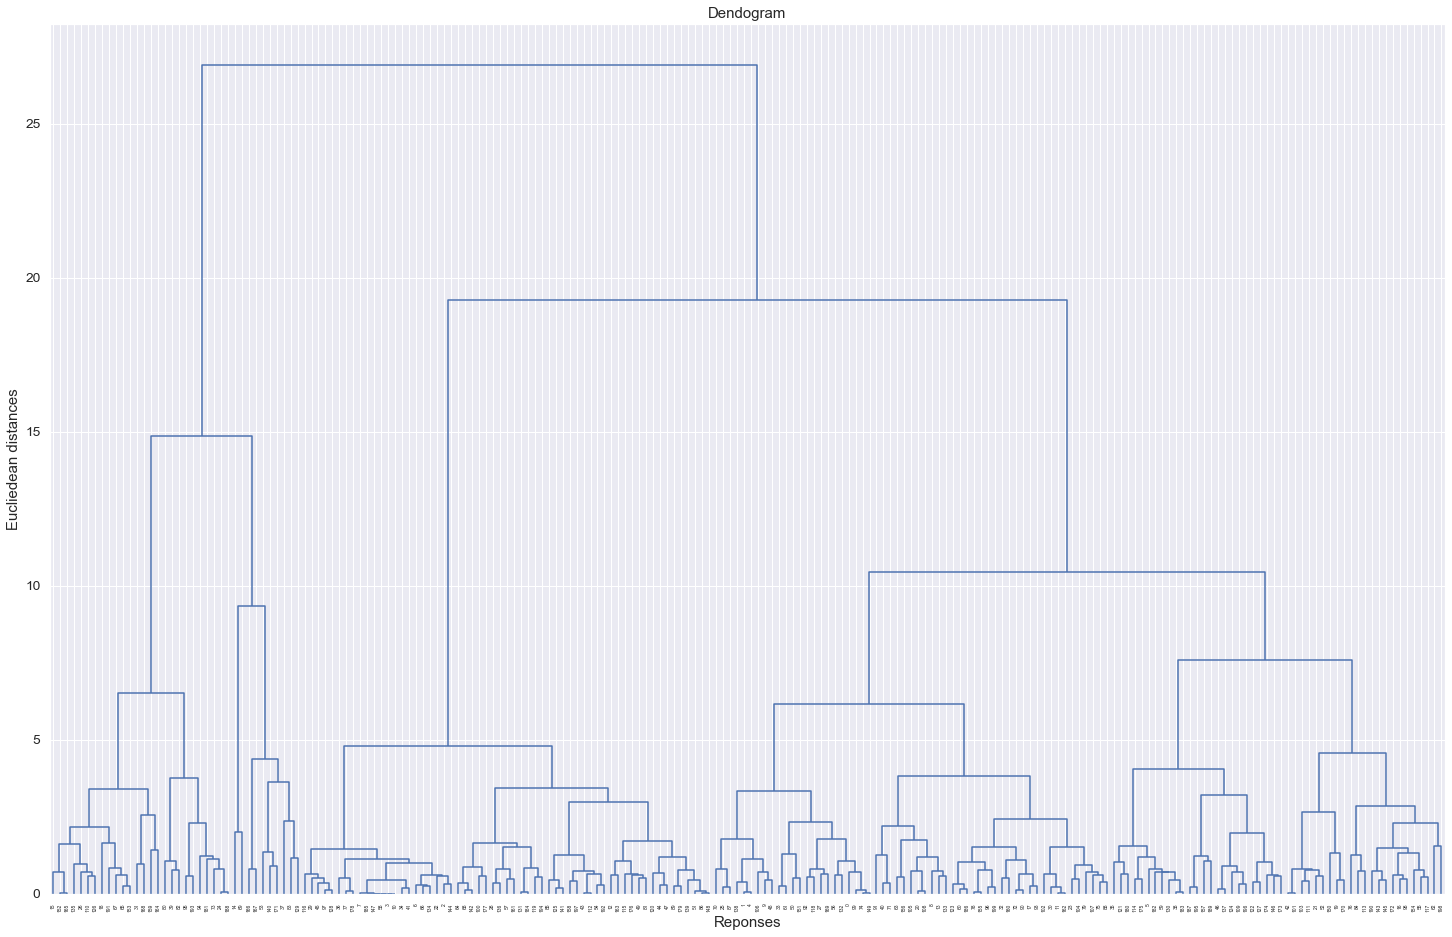

In [9]:
plt.figure(figsize=(25,16))
dendogram = sch.dendrogram(sch.linkage(X_scaled,method='ward'),truncate_mode='level',color_threshold=0)
plt.title("Dendogram")
plt.xlabel("Reponses")
plt.ylabel("Eucliedean distances")
plt.show()

### Fitting hierachical cluster

In [10]:
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [11]:
y_hc = hc.fit_predict(X_scaled)

In [12]:
y_hc

array([1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       2, 1, 0, 1, 0, 1, 2, 2, 1, 0, 1, 1, 2, 1, 2, 0, 1, 0, 1, 2, 1, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 0,
       2, 0, 2, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 1,
       1, 2, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 0, 1, 2, 0, 1, 2,
       1, 1, 2, 0, 2, 1, 1, 2, 0, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 2, 0, 1, 2, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 0, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 2, 0, 2, 1, 1, 2,
       1, 1], dtype=int64)

In [13]:
y = pd.DataFrame(y_hc,columns=['Cluster'])

In [14]:
y

,Cluster
0,1
1,1
2,2
3,2
4,1
...,...
195,1
196,1
197,2
198,1


In [15]:
y['Cluster'].unique()

array([1, 2, 0], dtype=int64)

In [16]:
y['Cluster'].value_counts()

1    105
2     59
0     36
Name: Cluster, dtype: int64

In [17]:
newdf = pd.concat([df,y],axis=1)

In [18]:
newdf

,id,friendly,inviting,awesome,quirky,pleasant,Cluster
0,192,8.190957,8.190957,9.190957,10.0,10.000000,1
1,165,8.465142,8.465142,9.465142,10.0,8.465142,1
2,161,9.416985,10.000000,10.000000,10.0,9.416985,2
3,37,10.000000,10.000000,10.000000,10.0,10.000000,2
4,65,8.513661,8.513661,9.513661,10.0,8.513661,1
...,...,...,...,...,...,...,...
195,116,7.318483,7.318483,8.318483,10.0,5.318483,1
196,182,7.542145,6.542145,6.542145,10.0,6.542145,1
197,180,9.384686,10.000000,10.000000,10.0,8.384686,2
198,126,6.579968,7.579968,3.579968,10.0,7.579968,1


In [19]:
meandf = newdf.groupby(by='Cluster').mean()

In [20]:
meandf

,id,friendly,inviting,awesome,quirky,pleasant
Cluster,,,,,,
0,90.472222,5.943022,5.776356,5.581911,9.845805,5.693022
1,105.266667,7.767805,7.605900,7.783254,9.995200,7.667169
2,98.135593,9.385445,9.367292,9.517206,10.000000,9.351809


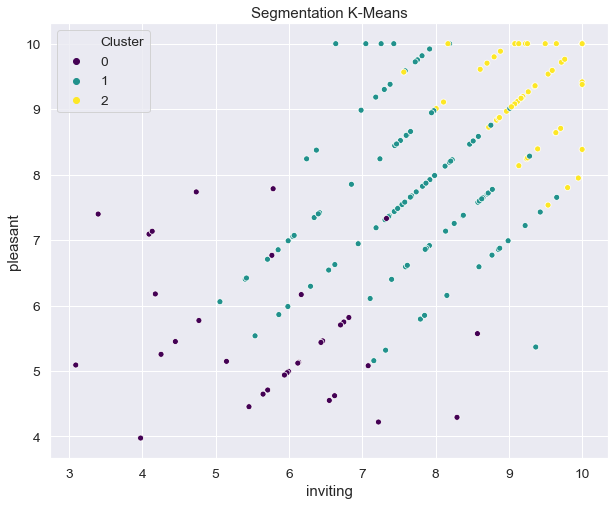

In [21]:
x_axis = newdf['inviting']
y_axis = newdf['pleasant']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=newdf['Cluster'],palette='viridis')
plt.title('Segmentation K-Means')
plt.show()

### K-Means Clustering

In [22]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

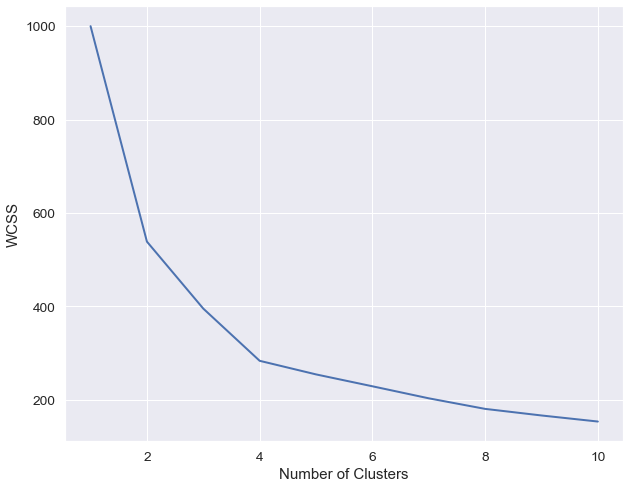

In [23]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss,linewidth=2)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

### Execute K-Means after determining the suitable cluster

In [24]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=0)

In [25]:
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

### Results

In [26]:
df_segm_kmeans = df.copy()

In [27]:
df_segm_kmeans

,id,friendly,inviting,awesome,quirky,pleasant
0,192,8.190957,8.190957,9.190957,10.0,10.000000
1,165,8.465142,8.465142,9.465142,10.0,8.465142
2,161,9.416985,10.000000,10.000000,10.0,9.416985
3,37,10.000000,10.000000,10.000000,10.0,10.000000
4,65,8.513661,8.513661,9.513661,10.0,8.513661
...,...,...,...,...,...,...
195,116,7.318483,7.318483,8.318483,10.0,5.318483
196,182,7.542145,6.542145,6.542145,10.0,6.542145
197,180,9.384686,10.000000,10.000000,10.0,8.384686
198,126,6.579968,7.579968,3.579968,10.0,7.579968


In [28]:
df_segm_kmeans['Segment K-Means'] = kmeans.labels_

In [29]:
df_segm_kmeans

,id,friendly,inviting,awesome,quirky,pleasant,Segment K-Means
0,192,8.190957,8.190957,9.190957,10.0,10.000000,1
1,165,8.465142,8.465142,9.465142,10.0,8.465142,1
2,161,9.416985,10.000000,10.000000,10.0,9.416985,1
3,37,10.000000,10.000000,10.000000,10.0,10.000000,1
4,65,8.513661,8.513661,9.513661,10.0,8.513661,1
...,...,...,...,...,...,...,...
195,116,7.318483,7.318483,8.318483,10.0,5.318483,0
196,182,7.542145,6.542145,6.542145,10.0,6.542145,0
197,180,9.384686,10.000000,10.000000,10.0,8.384686,1
198,126,6.579968,7.579968,3.579968,10.0,7.579968,0


In [30]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-Means']).mean()

In [31]:
df_segm_analysis

,id,friendly,inviting,awesome,quirky,pleasant
Segment K-Means,,,,,,
0,103.609756,6.707197,6.634026,6.536465,9.976262,6.475489
1,99.876106,8.879894,8.719973,8.980744,10.000000,8.857316
2,63.600000,5.978297,5.978297,5.778297,9.178297,5.978297


In [32]:
df_segm_analysis['NoofObservations'] = df_segm_kmeans[['Segment K-Means','friendly']].groupby(['Segment K-Means']).count()

In [33]:
df_segm_analysis['ProportionofObservations'] = df_segm_analysis['NoofObservations']/ df_segm_analysis['NoofObservations'].sum()

In [34]:
df_segm_analysis

,id,friendly,inviting,awesome,quirky,pleasant,NoofObservations,ProportionofObservations
Segment K-Means,,,,,,,,
0,103.609756,6.707197,6.634026,6.536465,9.976262,6.475489,82,0.410
1,99.876106,8.879894,8.719973,8.980744,10.000000,8.857316,113,0.565
2,63.600000,5.978297,5.978297,5.778297,9.178297,5.978297,5,0.025


In [35]:
df_segm_analysis.rename({0: 'Logo A',
                         1: 'Logo B',
                         2: 'Logo C'
                         },inplace=True)

In [36]:
df_segm_analysis

,id,friendly,inviting,awesome,quirky,pleasant,NoofObservations,ProportionofObservations
Segment K-Means,,,,,,,,
Logo A,103.609756,6.707197,6.634026,6.536465,9.976262,6.475489,82,0.410
Logo B,99.876106,8.879894,8.719973,8.980744,10.000000,8.857316,113,0.565
Logo C,63.600000,5.978297,5.978297,5.778297,9.178297,5.978297,5,0.025


In [37]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-Means'].map({0: 'Logo A',
                                                                  1: 'Logo B',
                                                                  2: 'Logo C'})

In [38]:
df_segm_kmeans

,id,friendly,inviting,awesome,quirky,pleasant,Segment K-Means,Labels
0,192,8.190957,8.190957,9.190957,10.0,10.000000,1,Logo B
1,165,8.465142,8.465142,9.465142,10.0,8.465142,1,Logo B
2,161,9.416985,10.000000,10.000000,10.0,9.416985,1,Logo B
3,37,10.000000,10.000000,10.000000,10.0,10.000000,1,Logo B
4,65,8.513661,8.513661,9.513661,10.0,8.513661,1,Logo B
...,...,...,...,...,...,...,...,...
195,116,7.318483,7.318483,8.318483,10.0,5.318483,0,Logo A
196,182,7.542145,6.542145,6.542145,10.0,6.542145,0,Logo A
197,180,9.384686,10.000000,10.000000,10.0,8.384686,1,Logo B
198,126,6.579968,7.579968,3.579968,10.0,7.579968,0,Logo A


### Plot the clusters

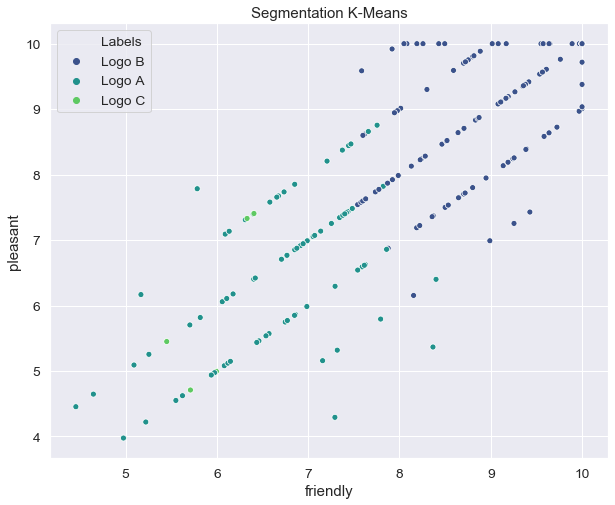

In [39]:
x_axis = df_segm_kmeans['friendly']
y_axis = df_segm_kmeans['pleasant']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_kmeans['Labels'],palette='viridis')
plt.title('Segmentation K-Means')
plt.show()

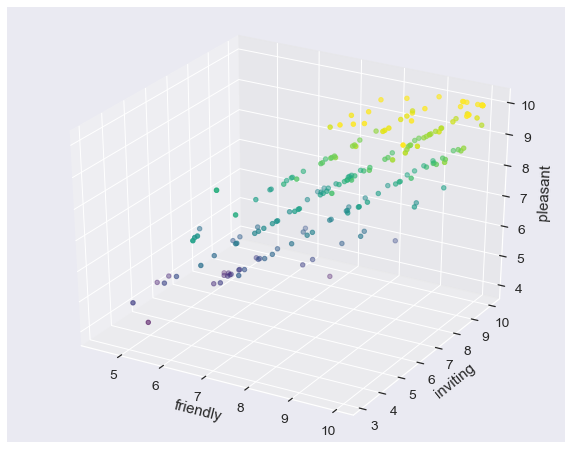

In [40]:
x_axis = df_segm_kmeans['friendly']
y_axis = df_segm_kmeans['inviting']
z_axis = df_segm_kmeans['pleasant']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x_axis,y_axis,z_axis,c=z_axis, cmap='viridis')

ax.set_xlabel('friendly')
ax.set_ylabel('inviting')
ax.set_zlabel('pleasant')

plt.show()